In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicHermiteSpline

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Edwar Isaías Pacheco Rojas
### CC: 1017240283
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
# Derivada por diferencias finitas de cinco puntos
def five_point_derivative(y: np.ndarray, h: float) -> np.ndarray:

  """
  Aproximación de dy/dx por el método de diferencias finitas de cinco puntos.

  Args:
    :y: Valores de función
    :h: Discretización

  Returns:
    :df/dx: Aproximación de la derivada de f en x
  """

  n = len(y)
  dy_dx = np.zeros_like(y)

  for k in range(n):
    # Diferencia hacia adelante
    if k == 0:
      dy_dx[k] = (-25*y[k] + 48*y[k+1] - 36*y[k+2] + 16*y[k+3] - 3*y[k+4]) / (12*h)
    # Diferencia sesgada hacia adelante
    elif k == 1:
      dy_dx[k] = (-3*y[k-1] - 10*y[k] + 18*y[k+1] - 6*y[k+2] + y[k+3]) / (12*h)
    # Diferencia sesgada hacia atrás
    elif k == n-2:
      dy_dx[k] = (3*y[k+1] + 10*y[k] - 18*y[k-1] + 6*y[k-2] - y[k-3]) / (12*h)
    # Diferencia hacia atrás
    elif k == n-1:
      dy_dx[k] = (25*y[k] - 48*y[k-1] + 36*y[k-2] - 16*y[k-3] + 3*y[k-4]) / (12*h)
    # Diferencias centradas
    else:
      dy_dx[k] = (y[k-2] - 8*y[k-1] + 8*y[k+1] - y[k+2]) / (12*h)

  return dy_dx



In [ ]:
# Definición y evaluación de la función f(x) = cos(x)
f = np.cos
x = np.linspace(0, 2*np.pi, 10)  # 10 valores en [0, 2π]
y = f(x)  # Valores de la función

# Discretización
h = x[1] - x[0]

In [ ]:
# Estimación de la primera derivada por el método de cinco puntos
df = five_point_derivative(y, h)
df

array([ 0.04033106, -0.6534667 , -0.97744964, -0.85955478, -0.3394647 ,
        0.3394647 ,  0.85955478,  0.97744964,  0.6534667 , -0.04033106])

In [ ]:
# Estimación de la segunda derivada por el método de cinco puntos
## Redefinición de h
h = 0.05
x = np.arange(0, 2*np.pi, h)
d2f = five_point_derivative(five_point_derivative(f(x), h), h)

In [ ]:
# Estimación de f''(π/8)
target_x = np.pi/8
target_index = np.argmin(np.abs(x - target_x))
d2f[target_index]
print(f"Estimación de f''(π/8) es: {d2f[target_index]}")

Estimación de f''(π/8) es: -0.9210606103417135


In [ ]:
# Cálculo del error
## La segunda derivada de f es -sin(x)
error = np.abs(-np.sin(target_x) - d2f[target_index])
print(f"El error es: {error}")

El error es: 0.5383771779766238


La aproximación mejorará con un h menor, lo que hace que las diferencias sean entre puntos más cercanos, lo que ofrece un valor de pendiente más preciso de la recta secante frente al valor de la derivada de la función (recta tangente).

#2.
Considere la función:

$$g(x) = x e^x$$

Encuentre la derivada númerica $g'(x)$ y $g''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

In [ ]:
# Derivada por diferencias finitas (método de los tres puntos)
def three_point_derivative(y: np.ndarray, h: float) -> np.ndarray:

  """
  Aproximación de dy/dx por el método de diferencias finitas de tres puntos.

  Args:
    :y: Valores de función
    :h: Discretización

  Returns:
    :df/dx: Aproximación de la derivada
  """

  n = len(y)
  dy_dx = np.zeros_like(y)

  for k in range(n):
    # Diferencia hacia adelante
    if k == 0:
      dy_dx[k] = (-3*y[k] + 4*y[k+1] - y[k+2]) / (2*h)
    # Diferenicia hacia atrás
    elif k == n-1:
      dy_dx[k] = (3*y[k] - 4*y[k-1] + y[k-2]) / (2*h)
    # Diferencia centrada
    else:
      dy_dx[k] = (y[k+1] - y[k-1]) / (2*h)

  return dy_dx



In [ ]:
# Definición de la función g
x = sp.symbols('x')
g = x * sp.exp(x)

dg = sp.diff(g, x)  # Primera derivada
d2g = sp.diff(g, x, 2)  # Segunda derivada

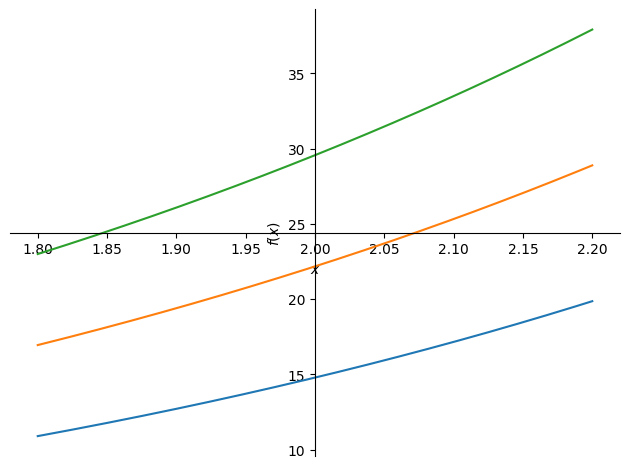

In [ ]:
sp.plot(g, dg, d2g, (x, 1.8, 2.2))

In [ ]:
# Funciones tipo lambda
g = sp.lambdify(x, g, 'numpy')
dg = sp.lambdify(x, dg, 'numpy')
d2g = sp.lambdify(x, d2g, 'numpy')

In [ ]:
# Derivada numérica para g'(x) y g''(x)
x_vals = np.linspace(1.8, 2.2, 6)
h = x_vals[1] - x_vals[0]

##
g_vals = g(x_vals)
dg_vals = five_point_derivative(g(x_vals), h)
d2g_vals = five_point_derivative(dg(x_vals), h)

In [ ]:
# Estmaciones para g'(2.0) y g''(2.0)

target_x = 2.0
target_index = np.argmin(np.abs(x_vals - target_x))

print(f"Estimación de g'(2.0) es: {dg_vals[target_index]}")
print(f"Estimación de g''(2.0) es: {d2g_vals[target_index]}")

Estimación de g'(2.0) es: 21.01394058374556
Estimación de g''(2.0) es: 28.11325794856643


In [ ]:
# a) Estimación de las derivadas para diferentes valores de h
h_vals = np.linspace(0.01, 0.1, 10)

# Errores para las primeras derivadas estimadas
err1_five_points = np.zeros_like(h_vals)
err1_gradient = np.zeros_like(h_vals)
err1_scipy = np.zeros_like(h_vals)

# Errores para las segundas derivadas estimadas
err2_five_points = np.zeros_like(h_vals)
err2_gradient = np.zeros_like(h_vals)
err2_scipy = np.zeros_like(h_vals)

for i, h in enumerate(h_vals):

  ## ESTIMACIÓN PARA LA PRIMERA DERIVADA
  # Redefinición del dominio
  x_values = np.arange(1.8, 2.2, h)
  g_values = g(x_values)
  dg_values = five_point_derivative(g(x_values), h)
  d2g_values = five_point_derivative(dg(x_values), h)

  # Índice del dominio más cercano a 2.0
  # En algunos arreglos 2.0 no queda en el conjunto de datos
  target_index = np.argmin(np.abs(x_values - 2.0))

  # Estimación por gradiente
  diff_g_grad = np.gradient(g_values, h)
  # Estimación por diferencia finita de cinco puntos
  dg_values
  # Estimación de la derivada por medio de scipy
  chs = CubicHermiteSpline(x_values, g_values, dg_values)  # Polinomio de
                                                           # interpolación
  diff_chs = chs.derivative()  # Derivada de la función de interpolación

  # Estimación de la derivada por Hermite (scipy)
  diff_g_scipy = diff_chs(x_values)

  ## Cálculo y almacenamiento de errores
  err1_five_points[i] = np.abs(dg(x_values[target_index]) - dg_values[target_index])
  err1_gradient[i] = np.abs(dg(x_values[target_index]) - diff_g_grad[target_index])
  err1_scipy[i] = np.abs(dg(x_values[target_index]) - diff_g_scipy[target_index])

  ## ESTIMACIÓN PARA LA SEGUNDA DERIVADA

  # Estimación por gradiente
  diff2_g_grad = np.gradient(dg_values, h)
  # Estimación por diferencia finita de cinco puntos
  d2g_values
  # Estimación de la derivada por medio de scipy
  chs2 = CubicHermiteSpline(x_values, dg_values, d2g_values)  # Polinomio de
                                                              # interpolación
  diff2_chs = chs2.derivative()  # Derivada de la función de interpolación

  # Estimación de la derivada por Hermite (scipy)
  diff2_g_scipy = diff_chs(x_values)

  ## Cálculo y almacenamiento de errores
  err2_five_points[i] = np.abs(d2g(x_values[target_index]) - d2g_values[target_index])
  err2_gradient[i] = np.abs(d2g(x_values[target_index]) - diff2_g_grad[target_index])
  err2_scipy[i] = np.abs(d2g(x_values[target_index]) - diff2_g_scipy[target_index])

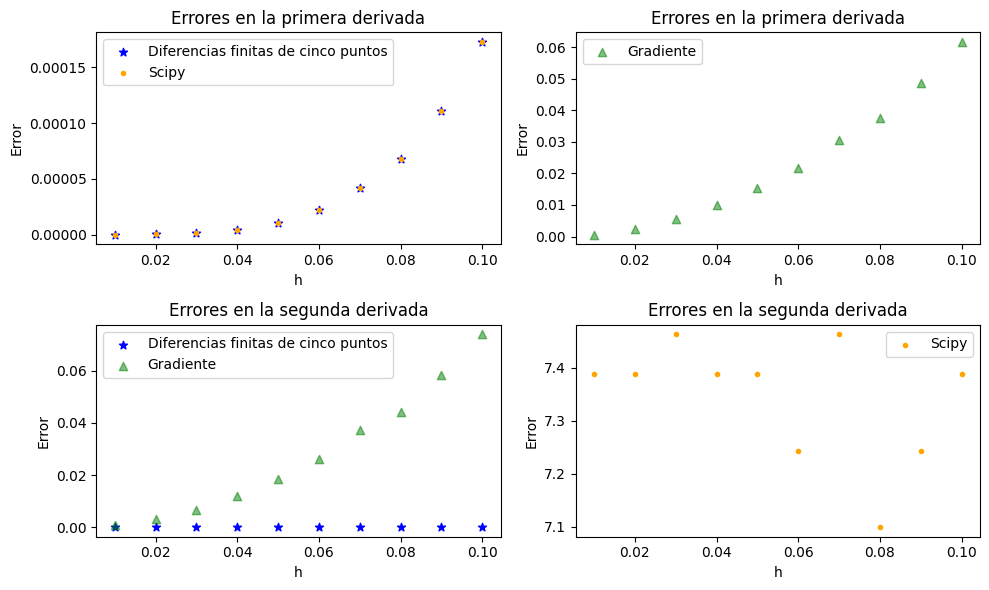

In [ ]:
# Gráficas para comparar los errores
fig, ax = plt.subplots(2, 2, figsize=(10, 6))
ax[0, 0].scatter(h_vals, err1_five_points, marker='*', color='b', label='Diferencias finitas de cinco puntos')
ax[0, 0].scatter(h_vals, err1_scipy, marker='.', color='orange', label='Scipy')
ax[0, 0].set_xlabel('h')
ax[0, 0].set_ylabel('Error')
ax[0, 0].set_title('Errores en la primera derivada')
ax[0, 0].legend()
ax[0, 1].scatter(h_vals, err1_gradient, marker='^', color='g', label='Gradiente', alpha=0.5)
ax[0, 1].set_xlabel('h')
ax[0, 1].set_ylabel('Error')
ax[0, 1].set_title('Errores en la primera derivada')
ax[0, 1].legend()

ax[1, 0].scatter(h_vals, err2_five_points, marker='*', color='b', label='Diferencias finitas de cinco puntos')
ax[1, 0].scatter(h_vals, err2_gradient, marker='^', color='g', label='Gradiente', alpha=0.5)
ax[1, 0].set_xlabel('h')
ax[1, 0].set_ylabel('Error')
ax[1, 0].set_title('Errores en la segunda derivada')
ax[1, 0].legend()
ax[1, 1].scatter(h_vals, err2_scipy, marker='.', color='orange', label='Scipy')
ax[1, 1].set_xlabel('h')
ax[1, 1].set_ylabel('Error')
ax[1, 1].set_title('Errores en la segunda derivada')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

Los errores más pequeños y estables se obtienen con el método de diferencias finitas con cinco puntos, y se obtienen mejores resultados para un h más pequeño. Luego, el valor óptimo sería con h=0.01.

#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.